## Exploration Ingestion Monitoring

....

In [1]:
## https://github.com/dataforgoodfr/quotaclimat/blob/main/notebooks/get_started_sitemap.ipynb
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')

from quotaclimat.data_ingestion.config_sitmap import MEDIA_CONFIG, SITEMAP_CONFIG
from quotaclimat.data_processing.sitemap.sitemap_processing import load_all
df = load_all("../data_public/sitemap_dumps/")

In [2]:
df.shape


(291085, 9)

In [3]:
df.columns

Index(['news_title', 'image_caption', 'download_date', 'publication_name',
       'news_publication_date', 'news_keywords', 'section', 'media_type',
       'download_date_last'],
      dtype='object')

In [4]:
df

,news_title,image_caption,download_date,publication_name,news_publication_date,news_keywords,section,media_type,download_date_last
https://www.bfmtv.com/replay-emissions/bfmtvsd/poutine-moscou-va-atteindre-ses-objectifs-25-11_VN-202211250780.html,"Poutine : Moscou va ""atteindre ses objectifs"" ...","Poutine : Moscou va ""atteindre ses objectifs"" ...",2022-11-27,BFMTV,2022-11-25,NaN,"[replay-emissions, bfmtvsd]",tv,2022-11-27
https://www.bfmtv.com/replay-emissions/week-end-direct/meres-de-soldats-mise-en-scene-de-poutine-26-11_VN-202211260405.html,Mères de soldats: mise en scène de Poutine ? -...,Mères de soldats: mise en scène de Poutine ? -...,2022-11-27,BFMTV,2022-11-26,NaN,"[replay-emissions, week-end-direct]",tv,2022-11-27
https://www.bfmtv.com/replay-emissions/week-end-premiere/un-dimanche-marque-par-l-arrivee-d-une-nouvelle-perturbation-dans-l-ouest-et-des-temperatures-plus-fraiches_VN-202211270074.html,Un dimanche marqué par l'arrivée d'une nouvell...,Un dimanche marqué par l'arrivée d'une nouvell...,2022-11-27,BFMTV,2022-11-27,NaN,"[replay-emissions, week-end-premiere]",tv,2022-11-27
https://www.bfmtv.com/meteo/le-temps-ce-dimanche-pluie-sur-le-nord-ouest-grisaille-generalisee_AD-202211270075.html,"Le temps ce dimanche: pluie sur le nord-ouest,...",La météo de ce dimanche 27 novembre,2022-11-27,BFMTV,2022-11-27,NaN,[meteo],tv,2022-11-27
https://www.bfmtv.com/police-justice/l-agent-du-fisc-tue-recevra-la-legion-d-honneur-a-titre-posthume_AN-202211270079.html,Gabriel Attal annonce que l'agent du fisc tué ...,Le ministre français des Comptes publics Gabri...,2022-11-27,BFMTV,2022-11-27,NaN,[police-justice],tv,2022-11-27
...,...,...,...,...,...,...,...,...,...
https://www.20minutes.fr/guide-achat/4036941-20230515-faites-belles-economies-ecrans-pc-gamer-samsung-chez-amazon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17
https://www.20minutes.fr/monde/4036974-20230515-pakistan-nouveau-rebondissement-apres-arrestation-ancien-premier-ministre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17
https://www.20minutes.fr/sport/tennis/4037000-20230515-masters-1000-rome-sensation-elimination-carlos-alcaraz-fabian-marozsan-135e-joueur-mondial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17
https://www.20minutes.fr/sport/football/4036972-20230515-fc-barcelone-ferons-tout-possible-ramener-messi-maison-annonce-laporta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17


In [5]:
news_title_count = df.groupby('download_date_last')['news_title'].count()

print(news_title_count)

download_date_last
2022-11-27    2349
2022-11-30    1724
2022-12-01    1823
2022-12-03    1544
2022-12-04    1573
              ... 
2023-05-13     138
2023-05-14      72
2023-05-15      56
2023-05-16     483
2023-05-17    2560
Name: news_title, Length: 143, dtype: int64


In [6]:
count_data = df.groupby('download_date_last').apply(lambda x: pd.Series({
    'nan_count': x['download_date'].isnull().sum(),
    'ok_values': len(x) - x['download_date'].isnull().sum(),
    'total_count': len(x)
})).reset_index()

print(count_data)


    download_date_last  nan_count  ok_values  total_count
0           2022-11-27          0       2349         2349
1           2022-11-30          0       1724         1724
2           2022-12-01          0       1823         1823
3           2022-12-03          0       1544         1544
4           2022-12-04          0       1573         1573
..                 ...        ...        ...          ...
138         2023-05-13       2989        140         3129
139         2023-05-14       3155         72         3227
140         2023-05-15       1945         56         2001
141         2023-05-16       2280        483         2763
142         2023-05-17       9734       3628        13362

[143 rows x 4 columns]


KeyError: 'okvalues'

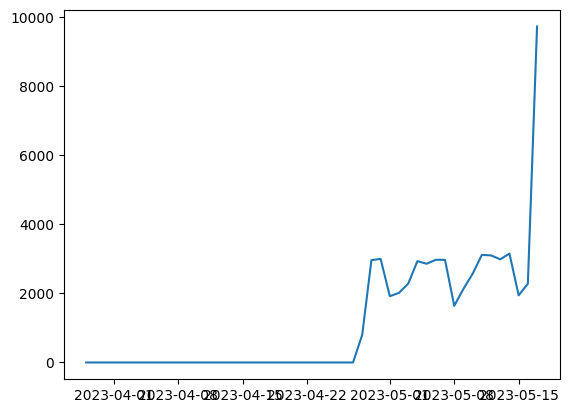

In [7]:
count_data['download_date_last'] = pd.to_datetime(count_data['download_date_last'])

# Plotting the line chart for nan_count
plt.plot(count_data['download_date_last'][-50:], count_data['nan_count'][-50:], label='nan_count')
# Plotting the line chart for ok_values
plt.plot(count_data['download_date_last'][-50:], count_data['okvalues'][-50:], label='ok_values')

# Adding labels and title
plt.xlabel('download_date_last')
plt.ylabel('Count')
plt.title('Count of nan_count and ok_values over time')

# Adding legend
plt.legend()
# Rotating x-axis labels for better readability and keeping then spread out
plt.xticks(rotation=45)


# Displaying the line chart
plt.show()
